First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64
Datas

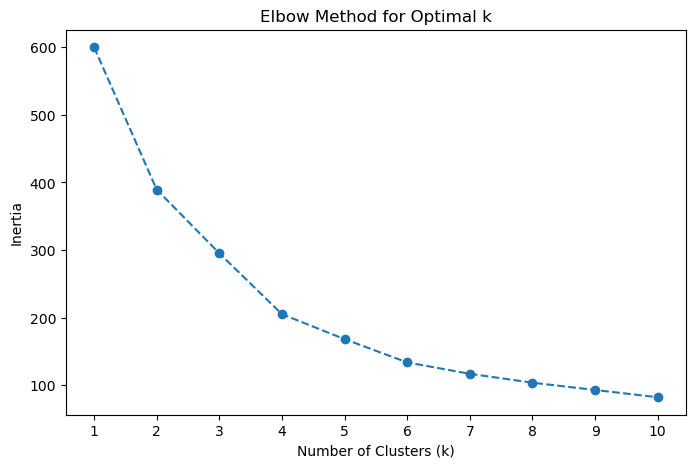


First 5 rows with cluster labels:
   CustomerID   Genre  Age  Annual_Income  Spending_Score  Cluster
0           1    Male   19             15              39        2
1           2    Male   21             15              81        2
2           3  Female   20             16               6        2
3           4  Female   23             16              77        2
4           5  Female   31             17              40        2


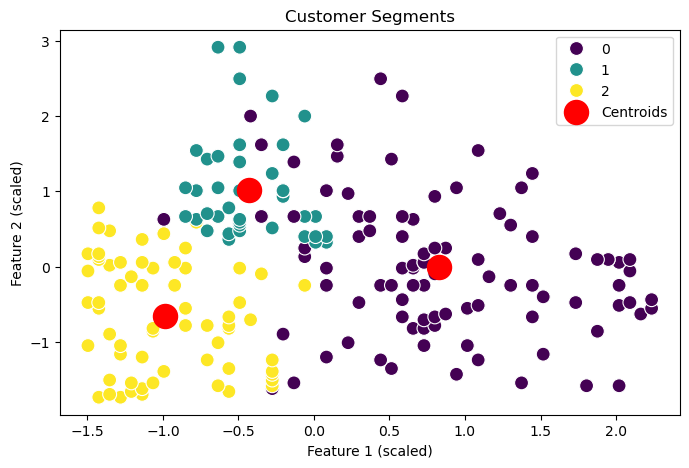

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("customer_data.csv")

# Display the fist few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Debugging: Print column names to verify correct names
print("Dataset Columns:", df.columns.tolist())

# Ensure correct column names
expected_columns = ['Age', 'Annual_Income', 'Spending_Score']
for col in expected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in dataset. Check column names.")

# Select relevant columns
features = df[expected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the standardized data
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle="--")  
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

# Perform K-Means clustering with the optimal k (from the elbow method, assume k=3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels 
print("\nFirst 5 rows with cluster labels:")
print(df.head())

# Visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids') 
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
